In [22]:
import glob
import shutil
import os
import re
import cv2
import numpy as np
import utils
'''
ori filename: output/BSIS_2/p0 kid_2 1.5 0 0 0.0 0.0 0 1693813135530563.png
'''
BG_NAME = 'BSIS_2'
IS_FISHEYE = False

img_path_ls = glob.glob(os.path.abspath(f'../output/{BG_NAME}/*.png'))
file_regex = r' \d+\.png'
img_path_ls = [fn for fn in img_path_ls if re.search(file_regex, fn)]
print(len(img_path_ls))
classes  = open("../ref/classes_.txt").read().split('\n')

cat_ls = sorted(list(set([' '.join(fn.split('\\')[-1].split(' ')[:2]) for fn in img_path_ls])))

node = utils.generate_RVS_filestructure(cat_ls)
utils.create_folder_structure(node, 'result/'+BG_NAME)


4128


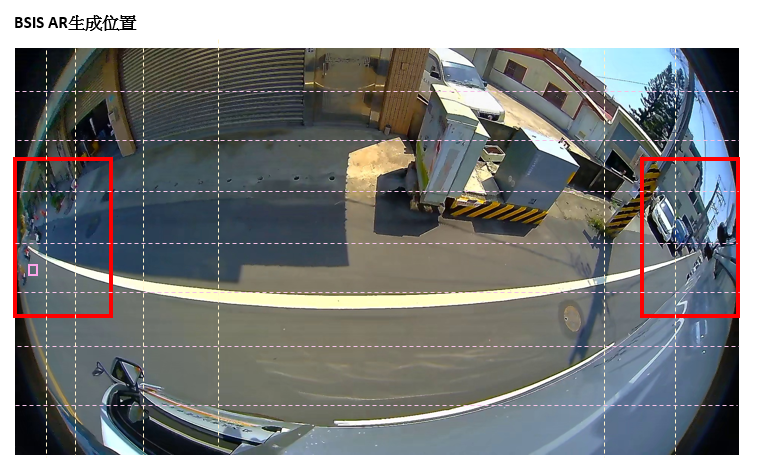

In [ ]:
import utils
for i, img_path in enumerate(img_path_ls):
    # print(img_path)
    sub_cat, model = img_path.split('\\')[-1].split(' ')[:2]
    main_cat = re.search(r'([a-zA-Z-_]+)', sub_cat).group(1)
    location_x = float(img_path.split('\\')[-1].split(' ')[2])
    location_y = float(img_path.split('\\')[-1].split(' ')[3])
    location_z = float(img_path.split('\\')[-1].split(' ')[4])
    rotation_x = float(img_path.split('\\')[-1].split(' ')[5])
    rotation_y = float(img_path.split('\\')[-1].split(' ')[6])
    rotation_z = float(img_path.split('\\')[-1].split(' ')[7])
    # print(main_cat, sub_cat, model)
    if not re.search(r'\d', sub_cat): sub_cat+='0'
    class_index = classes.index(sub_cat)
    if not os.path.isfile(img_path.replace('.png', '.txt')): continue
    with open(img_path.replace('.png', '.txt')) as f:
        content = f.read().strip('\n')
    if not len(content.strip()): continue
    grid_x, grid_y, yolo = utils.yolo2elan(content, split_pixel=40)

    path = f'result/{BG_NAME}/{main_cat}/{model}'

    filename = f'{sub_cat}_{grid_x:02d}{grid_y:02d}_{int(rotation_z)//90}_0'
    # print(class_index, path, filename)
    print(f'{path}/img/{filename}.png')
    if IS_FISHEYE:
        img = utils.format_fisheye_img(img_path)
        cv2.imwrite(f'{path}/img/{filename}.png', img)
    else:
        shutil.copy(img_path, f'{path}/img/{filename}.png')

    with open(f'{path}/txt/{filename}.txt', "w") as f:
        f.write(f"{class_index} {''.join([str(i) + ' ' for i in yolo])}")